In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from sklearn.metrics import classification_report, confusion_matrix

**Dataset**

https://www.kaggle.com/wordsforthewise/lending-club

**Features' information**

In [2]:
data_info = pd.read_csv('lending_club_info.csv', index_col='LoanStatNew')

In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
def feature_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
for i in data_info.index:
    print(i, " : ")
    feature_info(i)
    print('\n')

loan_amnt  : 
The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


term  : 
The number of payments on the loan. Values are in months and can be either 36 or 60.


int_rate  : 
Interest Rate on the loan


installment  : 
The monthly payment owed by the borrower if the loan originates.


grade  : 
LC assigned loan grade


sub_grade  : 
LC assigned loan subgrade


emp_title  : 
The job title supplied by the Borrower when applying for the loan.*


emp_length  : 
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


home_ownership  : 
The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER


annual_inc  : 
The self-reported annual income provided by the borrower during registration.


verification_sta

**Loading the Dataset**

In [6]:
data = pd.read_csv('lending_club_loan_two.csv')

In [7]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [9]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [10]:
data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

There are some null values which will be problamatic
I'll address this later

**EDA**

<AxesSubplot:xlabel='loan_status', ylabel='count'>

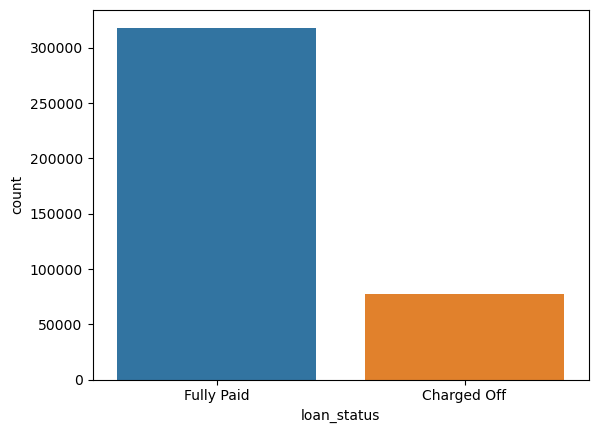

In [11]:
sns.countplot(x='loan_status', data=data)

This is obviously imbalance which might cause our model to overfit the fully paid class

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

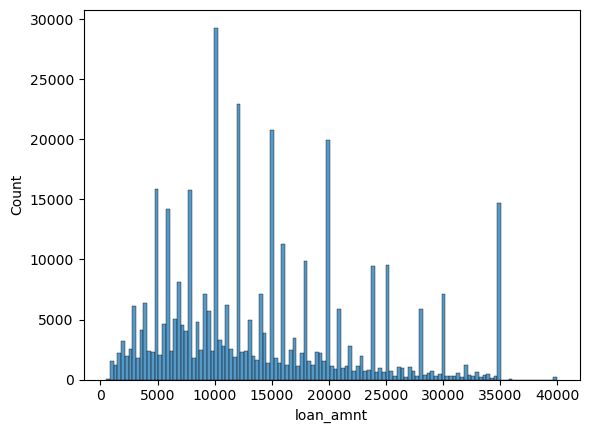

In [12]:
sns.histplot(data['loan_amnt'])

Checking the correlaation between features

In [13]:
data.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot:>

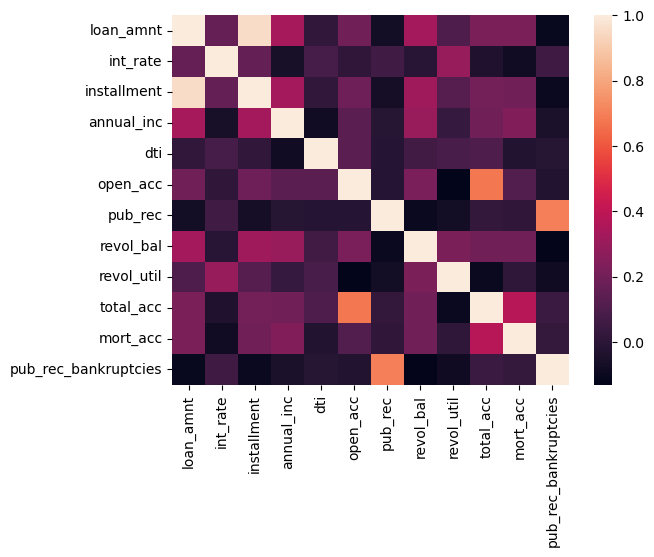

In [14]:
sns.heatmap(data.corr())

For example, we can observe that installment and load_amnt are highly correlated
We can explore this further

In [15]:
print('installment: ')
feature_info('installment')

installment: 
The monthly payment owed by the borrower if the loan originates.


In [16]:
print('loan_amnt: ')
feature_info('loan_amnt')

loan_amnt: 
The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

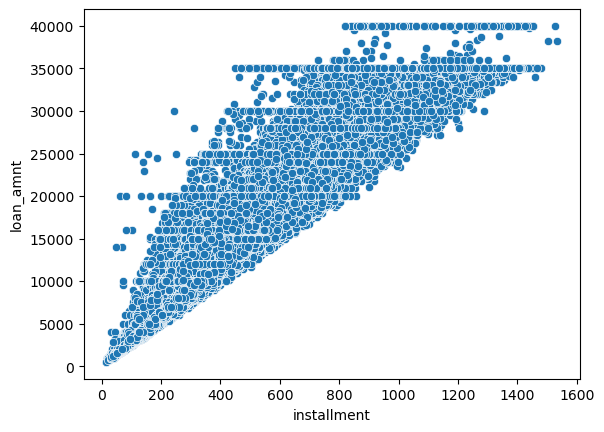

In [17]:
sns.scatterplot(x='installment', y='loan_amnt', data=data)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

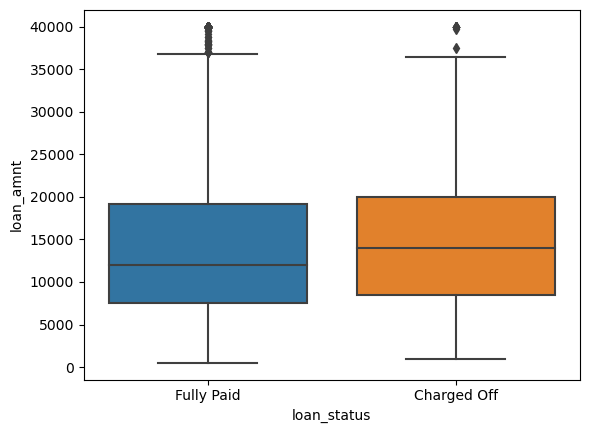

In [18]:
sns.boxplot(x='loan_status', y='loan_amnt', data=data)

In [19]:
data.groupby('loan_status').describe()

loan_amnt                                                      \
                count          mean          std     min     25%      50%   
loan_status                                                                 
Charged Off   77673.0  15126.300967  8505.090557  1000.0  8525.0  14000.0   
Fully Paid   318357.0  13866.878771  8302.319699   500.0  7500.0  12000.0   

                               int_rate             ... mort_acc        \
                 75%      max     count       mean  ...      75%   max   
loan_status                                         ...                  
Charged Off  20000.0  40000.0   77673.0  15.882587  ...      2.0  23.0   
Fully Paid   19225.0  40000.0  318357.0  13.092105  ...      3.0  34.0   

            pub_rec_bankruptcies                                               
                           count      mean       std  min  25%  50%  75%  max  
loan_status                                                                    
Charged Off              77586.0  0.128412  0.368853  0.0  0.0  0.0  0.0  8.0  
Fully Paid              317909.0  0.119997  0.352992  0.0  0.0  0.0  0.0  8.0  

[2 rows x 96 columns]

In [20]:
data.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


Exploring the grades and subgrades

In [21]:
data['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [22]:
data['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [23]:
feature_info('sub_grade')

LC assigned loan subgrade


<AxesSubplot:xlabel='grade', ylabel='count'>

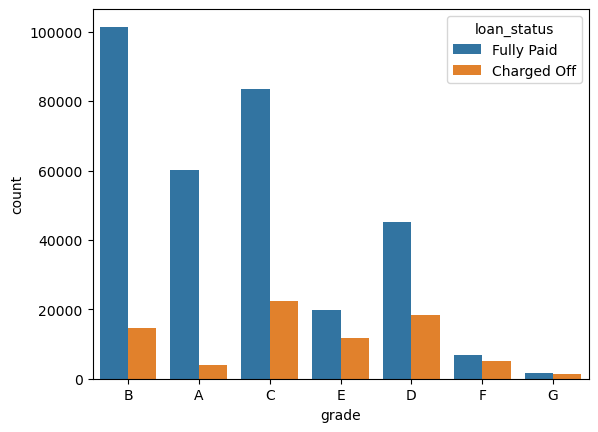

In [24]:
sns.countplot(x='grade', data=data, hue='loan_status')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

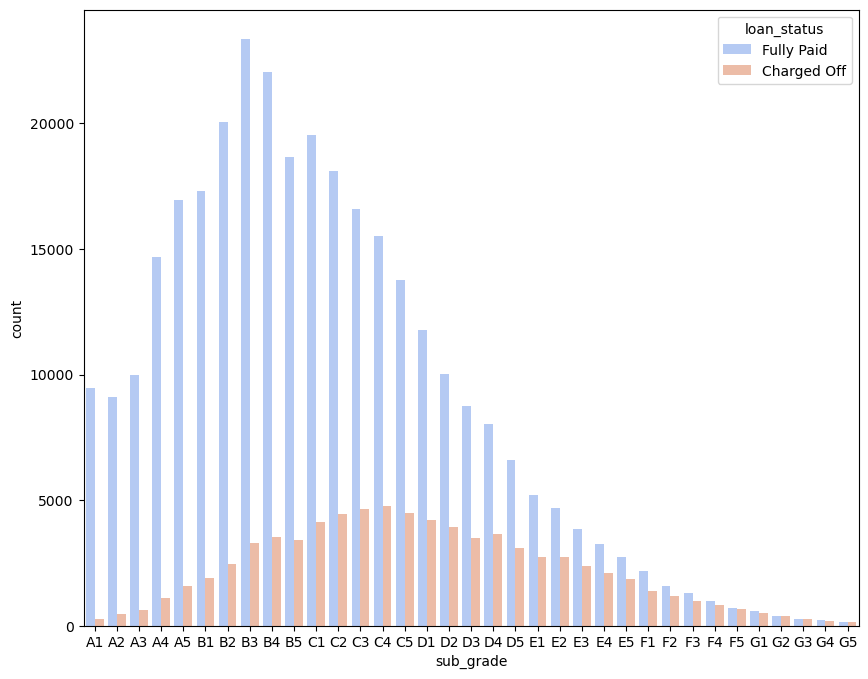

In [25]:
plt.figure(figsize=(10, 8))
sns.countplot(x='sub_grade', data=data, order=sorted(data['sub_grade'].unique()), palette='coolwarm', hue='loan_status')

F and G subgrades are less likely to pay. 

**Determining the labels**

In [26]:
data['loan_repaid'] = data['loan_status'].map({'Fully Paid': 1, 'Charged Off':0})

In [27]:
data[['loan_repaid', 'loan_status']].head()

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off


Correlation of the features with the labels

<AxesSubplot:>

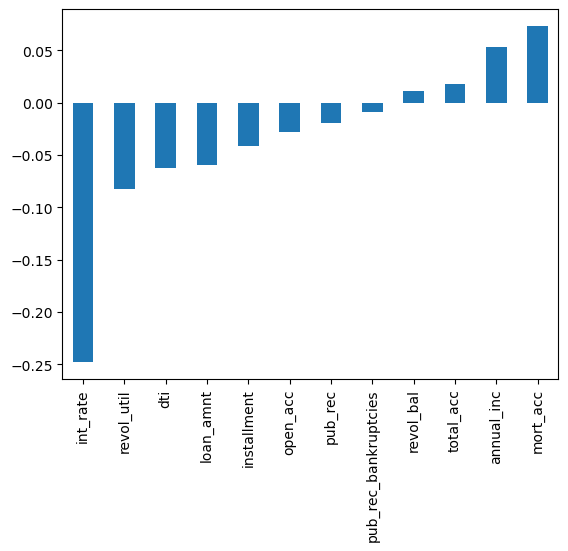

In [28]:
data.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

**Handling null values**

In [29]:
100 * data.isnull().sum() / len(data)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [30]:
feature_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [31]:
data['emp_title'].nunique()

173105

In [32]:
data['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

There are lots of job titles.
One hot categorizing these will not be an advantegous option
We can either categorize them or remove them
I'd rather remove this feature

In [33]:
data = data.drop('emp_title', axis=1)

In [34]:
sorted(data['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [35]:
emp_length_order = [
 '< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'
 ]

<AxesSubplot:xlabel='emp_length', ylabel='count'>

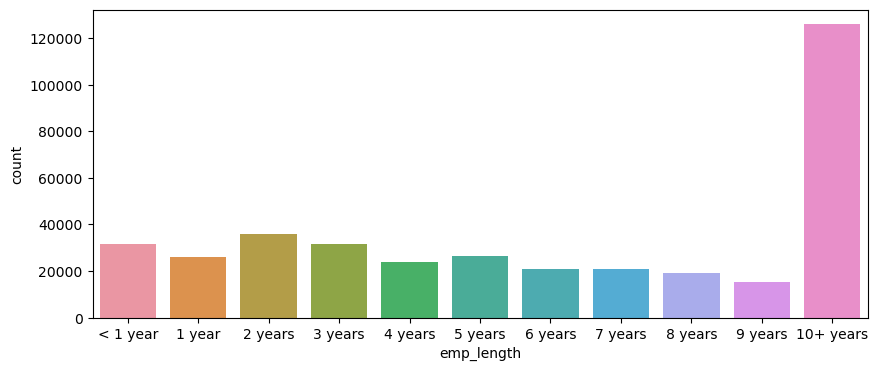

In [36]:
plt.figure(figsize=(10, 4))
sns.countplot(x='emp_length', data=data, order=emp_length_order)

In [37]:
emp_chargedoff = data[data['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

In [38]:
emp_fullypaid = data[data['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']

In [39]:
emp_chargedoff / (emp_chargedoff + emp_fullypaid)

emp_length
1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='emp_length'>

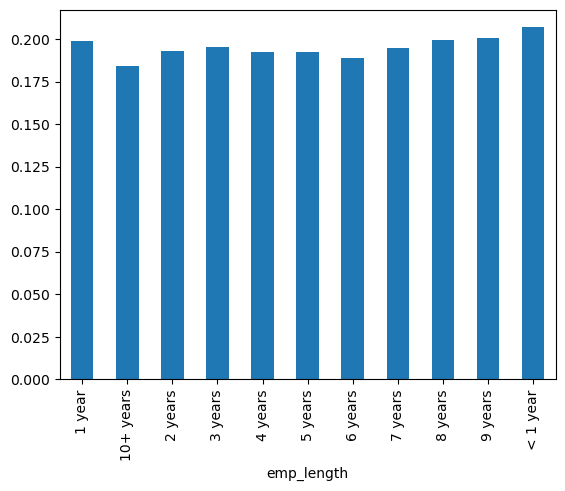

In [40]:
(emp_chargedoff / (emp_chargedoff + emp_fullypaid)).plot(kind='bar')

The feature seems not to be that informative and interesting .
We can drop it

In [41]:
data = data.drop('emp_length', axis=1)

In [42]:
data['purpose'].head()

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
Name: purpose, dtype: object

In [43]:
data['title'].head()

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
Name: title, dtype: object

In [44]:
feature_info('purpose')

A category provided by the borrower for the loan request. 


In [45]:
feature_info('title')

The loan title provided by the borrower


title and purpose features are the same.
We can drop title

In [46]:
data = data.drop('title', axis=1)

In [47]:
feature_info('mort_acc')

Number of mortgage accounts.


In [48]:
data['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

About 10 percent of all data are missing mort_acc feature so we can not drop the instances.
We can either drop the feature itself or try to logically fill the values 

In [49]:
data.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

toatal_acc seems to be correlated with mort_acc.
We might be able to use this in order to fill in the null values

In [50]:
data.groupby('total_acc').mean()['mort_acc']

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

We can use this series as a lookup and repalce missing mort_acc values based on the total_acc values and fill it 
with avergae value

In [51]:
total_acc_average = data.groupby('total_acc').mean()['mort_acc']

In [52]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_average[total_acc]
    else:
        return mort_acc

In [53]:
data['mort_acc'] = data.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [54]:
100 * data.isnull().sum() / len(data)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

revol_util and pub_rec_bankruptcies have a very small percentage of missing values so we can simply drop those instances

In [55]:
data = data.dropna()

In [56]:
100 * data.isnull().sum() / len(data)

loan_amnt               0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
dti                     0.0
earliest_cr_line        0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
initial_list_status     0.0
application_type        0.0
mort_acc                0.0
pub_rec_bankruptcies    0.0
address                 0.0
loan_repaid             0.0
dtype: float64

**Encoding Categorical Features**

In [57]:
data.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [58]:
feature_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [59]:
data['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [60]:
data['term'] = data['term'].apply(lambda term: int(term[:3]))

In [61]:
data['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

Grade is a part of sub_grade. It is duplicate information and we can drop it

In [62]:
data = data.drop('grade', axis=1)

In [63]:
dummies = pd.get_dummies(data['sub_grade'], drop_first=True)

data = pd.concat([data.drop('sub_grade', axis=1), dummies], axis=1)

In [64]:
feature_info('verification_status')

Indicates if income was verified by LC, not verified, or if the income source was verified


In [65]:
data['verification_status'].value_counts()

Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64

In [66]:
dummies = pd.get_dummies(data['verification_status'], drop_first=True)

data = pd.concat([data.drop('verification_status', axis=1), dummies], axis=1)

In [67]:
feature_info('application_type')

Indicates whether the loan is an individual application or a joint application with two co-borrowers


In [68]:
data['application_type'].value_counts()

INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [69]:
dummies = pd.get_dummies(data['application_type'], drop_first=True)

data = pd.concat([data.drop('application_type', axis=1), dummies], axis=1)

In [70]:
feature_info('initial_list_status')

The initial listing status of the loan. Possible values are – W, F


In [71]:
data['initial_list_status'].value_counts()

f    237346
w    157873
Name: initial_list_status, dtype: int64

In [72]:
dummies = pd.get_dummies(data['initial_list_status'], drop_first=True)

data = pd.concat([data.drop('initial_list_status', axis=1), dummies], axis=1)

In [73]:
feature_info('purpose')

A category provided by the borrower for the loan request. 


In [74]:
data['purpose'].value_counts()

debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: purpose, dtype: int64

In [75]:
dummies = pd.get_dummies(data['purpose'], drop_first=True)

data = pd.concat([data.drop('purpose', axis=1), dummies], axis=1)

In [76]:
feature_info('home_ownership')

The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER


In [77]:
data['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [78]:
data['home_ownership'] = data['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [79]:
data['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [80]:
dummies = pd.get_dummies(data['home_ownership'], drop_first=True)

data = pd.concat([data.drop('home_ownership', axis=1), dummies], axis=1)

In [81]:
data['address']

0            0174 Michelle Gateway\r\nMendozaberg, OK 22690
1         1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2         87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3                   823 Reid Ford\r\nDelacruzside, MA 00813
4                    679 Luna Roads\r\nGreggshire, VA 11650
                                ...                        
396025     12951 Williams Crossing\r\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\r\nRachelborough, ...
396027    953 Matthew Points Suite 414\r\nReedfort, NY 7...
396028    7843 Blake Freeway Apt. 229\r\nNew Michael, FL...
396029        787 Michelle Causeway\r\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

Zip codes would be helpful

In [82]:
data['address'].apply(lambda address: address[-5:])

0         22690
1         05113
2         05113
3         00813
4         11650
          ...  
396025    30723
396026    05113
396027    70466
396028    29597
396029    48052
Name: address, Length: 395219, dtype: object

In [83]:
data['zip_code'] = data['address'].apply(lambda address: address[-5:])

In [84]:
data['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [85]:
dummies = pd.get_dummies(data['zip_code'], drop_first=True)

data = pd.concat([data.drop('zip_code', axis=1), dummies], axis=1)

In [86]:
data = data.drop('address', axis=1)

In [87]:
feature_info('issue_d')

The month which the loan was funded


In [88]:
data = data.drop('issue_d', axis=1)

In [89]:
feature_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [90]:
data['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

Getting the years here would be helpfull

In [91]:
data['earliest_cr_year'] = data['earliest_cr_line'].apply(lambda date: int(date[-4:]))

In [92]:
data = data.drop('earliest_cr_line', axis=1)

In [93]:
data = data.drop('loan_status', axis=1)

As we saw earlier, the dataset is highly imbalanced which will cause the model to overfit to Fully Paid class.
I will oversample the minority class in order to tackle this issue

In [94]:
from imblearn.over_sampling import RandomOverSampler

In [95]:
X = data.drop('loan_repaid', axis=1)

In [96]:
y = data['loan_repaid']

In [97]:
scaler = MinMaxScaler()

In [98]:
X = scaler.fit_transform(X)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [100]:
ros = RandomOverSampler(sampling_strategy=0.65)

In [101]:
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
X_test_resampled, y_test_resampled = ros.fit_resample(X_test, y_test)

In [102]:
print(y_train_resampled.value_counts())

1    254133
0    165186
Name: loan_repaid, dtype: int64


In [103]:
model = LogisticRegression()

In [104]:
model.fit(X_train_resampled, y_train_resampled)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [105]:
y_pred = model.predict(X_test_resampled)

In [106]:
print(confusion_matrix(y_test_resampled, y_pred))
print('\n')
print(classification_report(y_pred, y_test_resampled, digits=4))

[[28385 12930]
 [ 6710 56853]]


              precision    recall  f1-score   support

           0     0.6870    0.8088    0.7430     35095
           1     0.8944    0.8147    0.8527     69783

    accuracy                         0.8127    104878
   macro avg     0.7907    0.8118    0.7978    104878
weighted avg     0.8250    0.8127    0.8160    104878



In [107]:
model = DecisionTreeClassifier()

In [108]:
model.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier()

In [109]:
y_pred = model.predict(X_test_resampled)

In [110]:
print(confusion_matrix(y_test_resampled, y_pred))
print('\n')
print(classification_report(y_pred, y_test_resampled, digits=4))

[[24202 17113]
 [ 6830 56733]]


              precision    recall  f1-score   support

           0     0.5858    0.7799    0.6691     31032
           1     0.8925    0.7683    0.8258     73846

    accuracy                         0.7717    104878
   macro avg     0.7392    0.7741    0.7474    104878
weighted avg     0.8018    0.7717    0.7794    104878



In [111]:
model = RandomForestClassifier().fit(X_train_resampled, y_train_resampled)

In [112]:
y_pred = model.predict(X_test_resampled)

In [113]:
print(confusion_matrix(y_test_resampled, y_pred))
print('\n')
print(classification_report(y_pred, y_test_resampled, digits=4))

[[20253 21062]
 [  980 62583]]


              precision    recall  f1-score   support

           0     0.4902    0.9538    0.6476     21233
           1     0.9846    0.7482    0.8503     83645

    accuracy                         0.7898    104878
   macro avg     0.7374    0.8510    0.7489    104878
weighted avg     0.8845    0.7898    0.8092    104878



In [114]:
model = KNeighborsClassifier().fit(X_train_resampled, y_train_resampled)

In [115]:
y_pred = model.predict(X_test_resampled)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [116]:
print(confusion_matrix(y_test_resampled, y_pred))
print('\n')
print(classification_report(y_pred, y_test_resampled, digits=4))

[[27226 14089]
 [10813 52750]]


              precision    recall  f1-score   support

           0     0.6590    0.7157    0.6862     38039
           1     0.8299    0.7892    0.8090     66839

    accuracy                         0.7626    104878
   macro avg     0.7444    0.7525    0.7476    104878
weighted avg     0.7679    0.7626    0.7645    104878



Seems like oversampling didn't help that much. Because it's replicative data afterall and it also ruins the models
performance on the Fully Paid class. It is reasonable because most people tend to repay their loan and at least we
have a nice recall which means that our bank will not give loan to the customers who are really likely to refuse repaying 
their loan.
Let's try the original data without oversampling

Let's get back to the original dataset

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [118]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (316175, 78)
Shape of X_test:  (79044, 78)
Shape of y_train:  (316175,)
Shape of y_test:  (79044,)


In [119]:
model = LogisticRegression().fit(X_train, y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [120]:
y_pred = model.predict(X_test)

In [121]:
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_pred, y_test, digits=4))

[[ 6930  8477]
 [  281 63356]]


              precision    recall  f1-score   support

           0     0.4498    0.9610    0.6128      7211
           1     0.9956    0.8820    0.9354     71833

    accuracy                         0.8892     79044
   macro avg     0.7227    0.9215    0.7741     79044
weighted avg     0.9458    0.8892    0.9059     79044



In [122]:
model = RandomForestClassifier().fit(X_train, y_train)

In [123]:
y_pred = model.predict(X_test)

In [124]:
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_pred, y_test, digits=4))

[[ 7006  8401]
 [  313 63324]]


              precision    recall  f1-score   support

           0     0.4547    0.9572    0.6166      7319
           1     0.9951    0.8829    0.9356     71725

    accuracy                         0.8898     79044
   macro avg     0.7249    0.9201    0.7761     79044
weighted avg     0.9450    0.8898    0.9061     79044



Let's also try a Neural Network

In [125]:
model = Sequential([
    Dense(64, activation=tf.nn.leaky_relu),
    Dropout(0.3),
    Dense(32, activation=tf.nn.leaky_relu),
    Dropout(0.3),
    Dense(16, activation=tf.nn.leaky_relu),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [126]:
model.compile(optimizer='adam', loss='binary_crossentropy')

In [127]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=100)

Epoch 1/100
4941/4941 [==============================] - 20s 3ms/step - loss: 0.2828 - val_loss: 0.2607
Epoch 2/100
4941/4941 [==============================] - 13s 3ms/step - loss: 0.2650 - val_loss: 0.2605
Epoch 3/100
4941/4941 [==============================] - 13s 3ms/step - loss: 0.2634 - val_loss: 0.2606
Epoch 4/100
4941/4941 [==============================] - 13s 3ms/step - loss: 0.2627 - val_loss: 0.2591
Epoch 5/100
4941/4941 [==============================] - 13s 3ms/step - loss: 0.2620 - val_loss: 0.2590
Epoch 6/100
4941/4941 [==============================] - 13s 3ms/step - loss: 0.2615 - val_loss: 0.2593
Epoch 7/100
4941/4941 [==============================] - 13s 3ms/step - loss: 0.2613 - val_loss: 0.2588
Epoch 8/100
4941/4941 [==============================] - 13s 3ms/step - loss: 0.2610 - val_loss: 0.2581
Epoch 9/100
4941/4941 [==============================] - 13s 3ms/step - loss: 0.2607 - val_loss: 0.2579
Epoch 10/100
4941/4941 [==============================] - 13s 3m

4941/4941 [==============================] - 15s 3ms/step - loss: 0.2571 - val_loss: 0.2555
Epoch 80/100
4941/4941 [==============================] - 15s 3ms/step - loss: 0.2570 - val_loss: 0.2565
Epoch 81/100
4941/4941 [==============================] - 15s 3ms/step - loss: 0.2567 - val_loss: 0.2563
Epoch 82/100
4941/4941 [==============================] - 15s 3ms/step - loss: 0.2568 - val_loss: 0.2559
Epoch 83/100
4941/4941 [==============================] - 15s 3ms/step - loss: 0.2568 - val_loss: 0.2555
Epoch 84/100
4941/4941 [==============================] - 15s 3ms/step - loss: 0.2570 - val_loss: 0.2563
Epoch 85/100
4941/4941 [==============================] - 15s 3ms/step - loss: 0.2569 - val_loss: 0.2557
Epoch 86/100
4941/4941 [==============================] - 15s 3ms/step - loss: 0.2568 - val_loss: 0.2556
Epoch 87/100
4941/4941 [==============================] - 15s 3ms/step - loss: 0.2566 - val_loss: 0.2577
Epoch 88/100
4941/4941 [==============================] - 15s 3ms/st

In [128]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                5056      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

In [129]:
model.history.history

{'loss': [0.28275856375694275,
  0.2649887204170227,
  0.26335039734840393,
  0.2626654803752899,
  0.26196637749671936,
  0.26145461201667786,
  0.2612500488758087,
  0.2610100507736206,
  0.26069098711013794,
  0.2606034278869629,
  0.260451078414917,
  0.26006367802619934,
  0.2600378096103668,
  0.2598024904727936,
  0.2594512403011322,
  0.2596064507961273,
  0.25935494899749756,
  0.25951603055000305,
  0.2594250738620758,
  0.2593349516391754,
  0.25935161113739014,
  0.2590698003768921,
  0.2588304281234741,
  0.2588841915130615,
  0.2587096393108368,
  0.2587817311286926,
  0.25867512822151184,
  0.2589711844921112,
  0.25835537910461426,
  0.2583477199077606,
  0.25839823484420776,
  0.25851789116859436,
  0.2584135830402374,
  0.2582743465900421,
  0.25827664136886597,
  0.25826120376586914,
  0.2581380009651184,
  0.25836390256881714,
  0.25802838802337646,
  0.2579318881034851,
  0.25813624262809753,
  0.25800788402557373,
  0.2580356299877167,
  0.2580971419811249,
  0.25

In [130]:
loss = pd.DataFrame(model.history.history)

In [131]:
loss.head()

,loss,val_loss
0,0.282759,0.260705
1,0.264989,0.260546
2,0.263350,0.260649
3,0.262665,0.259068
4,0.261966,0.258974


<AxesSubplot:>

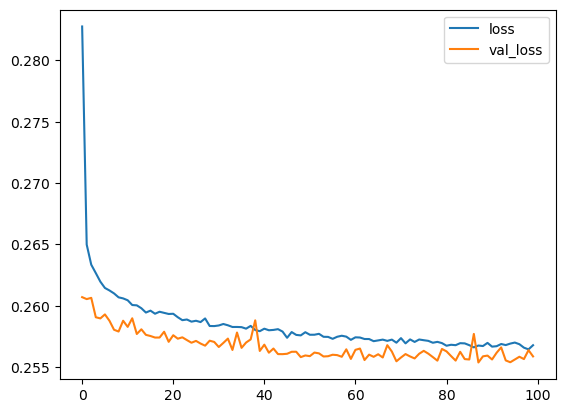

In [132]:
loss.plot()

The fluctuations in the error are due to using Dropout layer which is ok.

In [133]:
y_pred = (model.predict(X_test) > 0.5)

2471/2471 [==============================] - 4s 1ms/step


In [134]:
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_pred, y_test, digits=4))

[[ 7434  7973]
 [  741 62896]]


              precision    recall  f1-score   support

       False     0.4825    0.9094    0.6305      8175
        True     0.9884    0.8875    0.9352     70869

    accuracy                         0.8898     79044
   macro avg     0.7354    0.8984    0.7828     79044
weighted avg     0.9360    0.8898    0.9037     79044



Let's explore some test examples

In [135]:
random_number = random.randint(0, len(data))
test_customer = data.drop('loan_repaid', axis=1).iloc[random_number]

In [136]:
test_customer

loan_amnt            6500.00
term                   36.00
int_rate               13.35
installment           220.11
annual_inc          63000.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1982.00
Name: 95354, Length: 78, dtype: float64

In [137]:
test_customer = scaler.transform(test_customer.values.reshape(1, 78))

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [138]:
data.iloc[random_number]['loan_repaid']

1.0

In [139]:
[1 if model.predict(test_customer) > 0.5 else 0]

1/1 [==============================] - 0s 56ms/step


[1]

In [140]:
random_number = random.randint(0, len(data))
test_customer = data.drop('loan_repaid', axis=1).iloc[random_number]
test_customer = scaler.transform(test_customer.values.reshape(1, 78))

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [141]:
data.iloc[random_number]['loan_repaid']

1.0

In [142]:
[1 if model.predict(test_customer) > 0.5 else 0]

1/1 [==============================] - 0s 25ms/step


[1]

In [143]:
random_number = random.randint(0, len(data))
test_customer = data.drop('loan_repaid', axis=1).iloc[random_number]
test_customer = scaler.transform(test_customer.values.reshape(1, 78))

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [144]:
data.iloc[random_number]['loan_repaid']

1.0

In [145]:
[1 if model.predict(test_customer) > 0.5 else 0]

1/1 [==============================] - 0s 48ms/step


[1]